In [17]:
import transformers
import torch
import torch.nn as nn
import torch.functional as F

In [13]:
from utils.bert_models import MultiNNLayerParasiteLearnedBERT

In [14]:
m = MultiNNLayerParasiteLearnedBERT().cuda()

In [19]:
criterion = nn.CrossEntropyLoss()

In [24]:
import pandas as pd
from data.bert_processors.processors import QNLI, Tokenize_Transform2, RTE
import numpy as np
from loguru import logger

class Args:
    def __init__(self):
        self.max_seq_length = 400
        self.model = 'QNLI'
        
args = Args()

In [25]:
tokenizer = Tokenize_Transform2(args, 'bert-base-uncased')

In [26]:
qqp = RTE('train', transform = tokenizer)

In [28]:
length = []
for i in range(len(qqp)):
    length.append(qqp[i]['attention_mask'].numpy().sum())
    if not i % 10000:
        print(i)

0


In [29]:
max(length)

289

(array([ 531., 1122.,  292.,  201.,  191.,   88.,   50.,   11.,    2.,
           2.]),
 array([ 13. ,  40.6,  68.2,  95.8, 123.4, 151. , 178.6, 206.2, 233.8,
        261.4, 289. ]),
 <BarContainer object of 10 artists>)

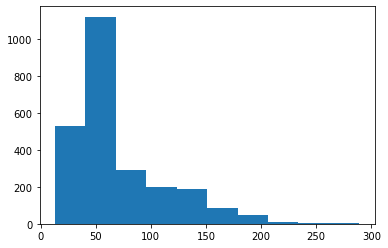

In [30]:
import matplotlib.pyplot as plt
plt.hist(length)

In [12]:
np.percentile(length, 95
             )

82.0

## Parasite only using the first encoder

### Initial parasite model 2/28/2021 on QNLI

In [1]:
losses= {'train_loss': [0.6937696159209643, 0.6920801216821693, 0.6874376548455611, 0.6836012619828604, 0.6807092412235757, 0.6782437231371438, 0.6760404684585094, 0.6740076264668519, 0.6719857640640868, 0.670027916074909, 0.6681799339961414, 0.6663278153759119, 0.664522431524854, 0.6627723758043371, 0.6610411609273441, 0.659329234974284, 0.657683618213511, 0.6561394120678697, 0.6546561504545921, 0.6532746770878556, 0.6518833096211282, 0.6505874462089936, 0.6493912297893174, 0.6482425221266336, 0.6471580141066026], 'dev_acc': [0.5206988226357767, 0.5565894417014812, 0.5845043676414736, 0.5934295480440562, 0.6090011393847322, 0.6055829851879985, 0.6146980630459552, 0.6247626281807824, 0.6355867831371059, 0.6251424230915306, 0.6439422711735663, 0.6600835548803646, 0.6507785795670338, 0.6513482719331561, 0.6619825294341056, 0.6707178123813141, 0.6576148879605014, 0.674515761488796, 0.67052791492594, 0.6750854538549184, 0.6652107861754653, 0.6741359665780479, 0.6775541207747816, 0.680212685150019, 0.6807823775161412]}

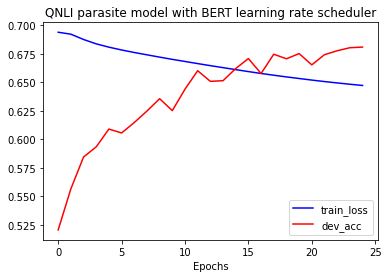

In [8]:
import matplotlib.pyplot as plt
plt.plot(losses['train_loss'], color = 'blue', label = 'train_loss')
plt.plot(losses['dev_acc'], color = 'red', label = 'dev_acc')
plt.xlabel("Epochs")
plt.title("QNLI parasite model with BERT learning rate scheduler")
plt.legend()

### Initial parasite model 2/28/2021 on QNLI with linear scheduler
python -m models.parasite --model QNLI --checkpoint bert-base-uncased --batch-size 16 --lr 1e-3 --num-labels 2 --max-seq-length 100 --warmup-proportion 0.01  --epochs 100

In [19]:
losses = {'train_loss': [0.693662550220016, 0.6912170656112112, 0.6862671730035586, 0.682659803640713, 0.6798559054031772, 0.6775459957956682, 0.6755567382804362, 0.6735831970809919, 0.6717268894560511, 0.6698584456389223, 0.6680191000700586, 0.666281733135706, 0.6646001622039008, 0.6629436753365731, 0.6613450303742335, 0.6596930247898408, 0.6581323784059084, 0.6566559259739532, 0.6553072807822045, 0.6539832167162093, 0.6526639965121424, 0.651429674135074, 0.6502001903445281, 0.649015561706657, 0.6479156007809266, 0.6467653948114505, 0.6456162152348779, 0.6445347066210244, 0.643484395641643, 0.6424714815713714, 0.6414751066609413, 0.6404966645879141, 0.6395779857260078, 0.6386505482338305, 0.6377836401314848, 0.6369361265771925, 0.6361380595626293, 0.6353223738978557, 0.6345554413628481, 0.6337904184626645, 0.6330874235421974, 0.6323725484946018, 0.6316749637383764, 0.6309961447851792, 0.6303564928139236, 0.6297388796738461, 0.6291431270256781, 0.6285376868764421, 0.6279525894866257, 0.6273878899333641, 0.6268544071784832, 0.6263423109246465, 0.6258207715071359, 0.6253147207880227, 0.6248242491943156, 0.6243365747405535, 0.6238620012414889, 0.6233930976784493, 0.6229398998647869, 0.62250232857475, 0.622060606538894, 0.621628013695783, 0.6212241854944317, 0.6208159582849081, 0.6204029496379689, 0.620021176753524, 0.6196373145285702, 0.6192547779335292, 0.6188714319318837, 0.6185049156661468, 0.6181667198708263, 0.6178391597861258, 0.6175077186007871, 0.6171734834123267, 0.6168476906499722, 0.6165244234367085, 0.6162074529374479, 0.6158977211732264, 0.6156050340420072, 0.6153150720232512, 0.6150323399160763, 0.6147457082116861, 0.6144563046049203, 0.6141689443670609, 0.6138941966150154, 0.6136182124470788, 0.6133416654655051, 0.6130627265674908, 0.6127974217195368, 0.6125394970805427, 0.6122773177723914, 0.6120327173733697, 0.6117842044021911, 0.6115447197283173, 0.6113123179448736, 0.6110726904974664, 0.610856734602123, 0.6106311333661985, 0.6104127585041559, 0.6102105941011796], 'dev_acc': [0.5260159513862515, 0.5770983668818838, 0.5896315989365742, 0.5898214963919484, 0.5995062666160274, 0.6055829851879985, 0.6186859096088112, 0.6319787314849981, 0.6342575009494873, 0.6361564755032283, 0.6484998101025446, 0.6477402202810483, 0.6429927838966958, 0.6538169388530194, 0.6623623243448538, 0.6699582225598177, 0.6488796050132928, 0.6851500189897456, 0.6654006836308394, 0.6617926319787315, 0.6720470945689327, 0.6807823775161412, 0.6842005317128751, 0.6798328902392708, 0.6735662742119256, 0.6887580706418533, 0.6849601215343715, 0.6938853019369541, 0.6874287884542347, 0.7018609950626662, 0.6876186859096088, 0.6938853019369541, 0.7045195594379036, 0.6718571971135586, 0.7030003797949107, 0.7024306874287884, 0.7043296619825294, 0.7026205848841626, 0.7092669958222559, 0.7054690467147741, 0.6935055070262058, 0.689574629699962, 0.6853399164451196, 0.697683251044436, 0.6963539688568173, 0.6838207368021268, 0.7064185339916446, 0.7054690467147741, 0.7115457652867452, 0.7096467907330042, 0.6986327383213065, 0.7067983289023927, 0.7134447398404862, 0.7153437143942272, 0.713254842385112, 0.7183820736802127, 0.691796429927839, 0.7113558678313711, 0.691796429927839, 0.7143942271173567, 0.719141663501709, 0.7031902772502848, 0.6862894037219901, 0.7181921762248386, 0.7138245347512343, 0.7073680212685151, 0.7202810482339537, 0.72104063805545, 0.7104063805545006, 0.7166729965818458, 0.7052791492593999, 0.7111659703759969, 0.7096467907330042, 0.6982529434105583, 0.7130649449297379, 0.7183820736802127, 0.6912267375617167, 0.7111659703759969, 0.7136346372958602, 0.7096467907330042, 0.7187618685909609, 0.7102164830991264, 0.7212305355108242, 0.7111659703759969, 0.7145841245727307, 0.6959741739460691, 0.7189517660463349, 0.7035700721610331, 0.7124952525636157, 0.724838587162932, 0.7257880744398025, 0.7200911507785795, 0.6965438663121915, 0.6800227876946449, 0.7081276110900114, 0.7174325864033422, 0.7162932016710976, 0.7200911507785795, 0.7235093049753133, 0.7134447398404862]}

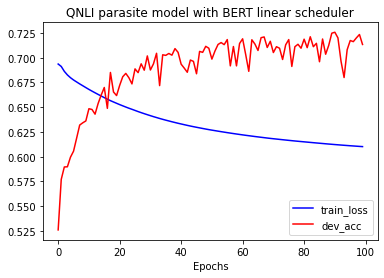

In [29]:
import matplotlib.pyplot as plt
plt.plot(losses['train_loss'], color = 'blue', label = 'train_loss')
plt.plot(losses['dev_acc'], color = 'red', label = 'dev_acc')
plt.xlabel("Epochs")
plt.title("QNLI parasite model with BERT linear scheduler")
plt.legend(loc = 'lower right')

## Parasite using all encoders, and no parasite for embedding layer

In [31]:
losses = {'train_loss': [0.6893765096705121, 0.6836724050753425, 0.6799911031126206, 0.6774251660454912, 0.6755924382220876, 0.6742097186262305, 0.6730112248918744, 0.6718765588418008, 0.6707693321500787, 0.6696623851514953, 0.6683827733235178, 0.666983270539558, 0.6654543598255807, 0.6636921745528143, 0.6618705499122887, 0.66005834016264, 0.6582660683856378, 0.6565858783950355, 0.6549594761440283, 0.6533399799017595, 0.6517830365660396, 0.6502920442360969, 0.6488916347271058, 0.6474892460827082, 0.6461840794657995, 0.6448631510038026, 0.6436582412404055, 0.6424430622448285, 0.6412915411009451, 0.6401763403233799, 0.639086163145706, 0.6380271072547863, 0.6369817586363764, 0.6360118594364863, 0.6350646278527363, 0.6341703736118516, 0.6332914296002976, 0.6324368723700899, 0.6316129785850005, 0.6308021253101164, 0.6300307290735943, 0.6292709684503185, 0.6285365424629654, 0.6278375505734771, 0.6271459553245018, 0.6264895137548084, 0.6258436969561577, 0.6251867609789761, 0.6245683314393116, 0.6239574051017073, 0.6233760201672051, 0.622799885218202, 0.6222388944695547, 0.6216826278312252, 0.6211460661978923, 0.6206035391909082, 0.6200852532457066, 0.6195898594950753, 0.6190987908489531, 0.6186139977841467, 0.6181404780665525, 0.617671508966076, 0.6172203249067554, 0.6167811845262341, 0.6163433288710495, 0.6159188666260763, 0.6155078364665292, 0.6150850533497266, 0.614679916084186, 0.6142960337308747, 0.6139090390527846, 0.6135287017937765, 0.6131530228179362, 0.6127855885758822, 0.6124148459693459, 0.6120469613368473, 0.6116939678534611, 0.6113376215921659, 0.6109958238544486, 0.6106760156519937, 0.6103595576107494, 0.6100361317129996, 0.609717291318167, 0.6094052089772181, 0.6090949734433556, 0.608788722947038, 0.608488638487263, 0.6081968997998785, 0.6079065674390681, 0.6076197729223957, 0.6073369385850111, 0.6070620575947706, 0.6068000649418812, 0.6065268021704308, 0.6062718837527743, 0.6060074088478932, 0.6057479867475021, 0.6054979519389119, 0.60524804723457, 0.6049938489305039], 'dev_acc': [0.5628560577288264, 0.5824154956323585, 0.5837447778199772, 0.5884922142043296, 0.6040638055450057, 0.6004557538928978, 0.6012153437143942, 0.5972274971515382, 0.6194454994303077, 0.6183061146980631, 0.6325484238511204, 0.6315989365742499, 0.6340676034941132, 0.6350170907709837, 0.6315989365742499, 0.6712875047474364, 0.6268515001898974, 0.6678693505507026, 0.6479301177364223, 0.6733763767565515, 0.6682491454614509, 0.6870489935434865, 0.6824914546145082, 0.6929358146600836, 0.655146221040638, 0.680212685150019, 0.6849601215343715, 0.6935055070262058, 0.6963539688568173, 0.7018609950626662, 0.6623623243448538, 0.6872388909988606, 0.6957842764906951, 0.6916065324724648, 0.703380174705659, 0.7007216103304216, 0.6946448917584505, 0.701481200151918, 0.7067983289023927, 0.6982529434105583, 0.695594379035321, 0.6815419673376377, 0.6602734523357388, 0.7050892518040258, 0.7086973034561337, 0.666729965818458, 0.7077478161792632, 0.6935055070262058, 0.6967337637675655, 0.7035700721610331, 0.7107861754652488, 0.7047094568932776, 0.6908469426509685, 0.7079377136346373, 0.695594379035321, 0.7111659703759969, 0.6963539688568173, 0.6889479680972275, 0.6828712495252564, 0.703380174705659, 0.7130649449297379, 0.6866691986327383, 0.686099506266616, 0.6881883782757311, 0.7126851500189898, 0.6853399164451196, 0.7026205848841626, 0.6997721230535511, 0.7111659703759969, 0.6978731484998101, 0.7164830991264717, 0.691796429927839, 0.7143942271173567, 0.7153437143942272, 0.7149639194834789, 0.7079377136346373, 0.6986327383213065, 0.7140144322066084, 0.7193315609570832, 0.7092669958222559, 0.7109760729206228, 0.7153437143942272, 0.7107861754652488, 0.6986327383213065, 0.7134447398404862, 0.6807823775161412, 0.7045195594379036, 0.6488796050132928, 0.6940751993923281, 0.7178123813140904, 0.6906570451955943, 0.6982529434105583, 0.6824914546145082, 0.6462210406380554, 0.6832510444360046, 0.7100265856437524, 0.7050892518040258, 0.7045195594379036, 0.7123053551082416, 0.6887580706418533]}

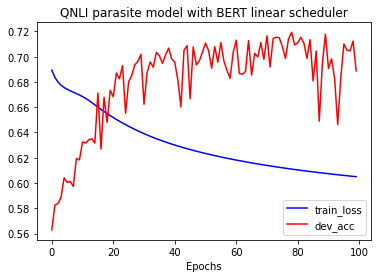

In [32]:
import matplotlib.pyplot as plt
plt.plot(losses['train_loss'], color = 'blue', label = 'train_loss')
plt.plot(losses['dev_acc'], color = 'red', label = 'dev_acc')
plt.xlabel("Epochs")
plt.title("QNLI parasite model with BERT linear scheduler")
plt.legend(loc = 'lower right')

## Parasite using all encoders, and with parasite for embedding layer

In [1]:
from utils.bert_models import MultiNNLayerParasiteLearnedBERT

In [2]:
model = MultiNNLayerParasiteLearnedBERT(100).to('cuda')

In [3]:
params = []
ps = []
for n,p in model.named_parameters():
    if p.requires_grad:
        params.append(n)
        ps.append(p)

In [5]:
[p.shape for p in ps]

[torch.Size([768, 768]),
 torch.Size([768]),
 torch.Size([1, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([2, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([3, 100]),
 torch.Size([1, 1, 768]),
 torch.Size([2, 768]),
 torch.Size([2])]